In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import re

In [2]:
#Ignore Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load datasets
training_file_path = 'twitter_training.csv'
validation_file_path = 'twitter_validation.csv'

training_data = pd.read_csv(training_file_path, encoding='latin1', header=None)
validation_data = pd.read_csv(validation_file_path, encoding='latin1', header=None)

In [4]:
# Assign column names
columns = ['ID', 'Category', 'Sentiment', 'Text']
training_data.columns = columns
validation_data.columns = columns

# Combine datasets for preprocessing
combined_data = pd.concat([training_data, validation_data], ignore_index=True)

In [5]:
# Preprocessing function
def clean_text(text):
    if not isinstance(text, str):  # Check if the input is not a string
        return ""  # Replace with an empty string
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    return text

In [6]:
# Fill missing values in 'Text' column with an empty string
combined_data['Text'] = combined_data['Text'].fillna("")

# Apply the cleaning function
combined_data['Cleaned_Text'] = combined_data['Text'].apply(clean_text)

# Encode target labels
label_encoder = LabelEncoder()
combined_data['Encoded_Sentiment'] = label_encoder.fit_transform(combined_data['Sentiment'])

In [7]:
# Split back into training and validation sets
train_data = combined_data.iloc[:len(training_data)]
val_data = combined_data.iloc[len(training_data):]

# Prepare data for modeling
X_train = train_data['Cleaned_Text']
Y_train = train_data['Encoded_Sentiment']
X_val = val_data['Cleaned_Text']
Y_val = val_data['Encoded_Sentiment']

In [8]:
# Create a pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression(max_iter=200))
])

# Train the model
pipeline.fit(X_train, Y_train)
# Predict on validation data
Y_pred = pipeline.predict(X_val)
# Evaluation
accuracy = accuracy_score(Y_val, Y_pred)
classification_rep = classification_report(Y_val, Y_pred, target_names=label_encoder.classes_)
# Getting Accuracy
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.80      0.72      0.76       172
    Negative       0.77      0.89      0.83       266
     Neutral       0.86      0.72      0.78       285
    Positive       0.80      0.86      0.83       277

    accuracy                           0.81      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.81      0.80      1000



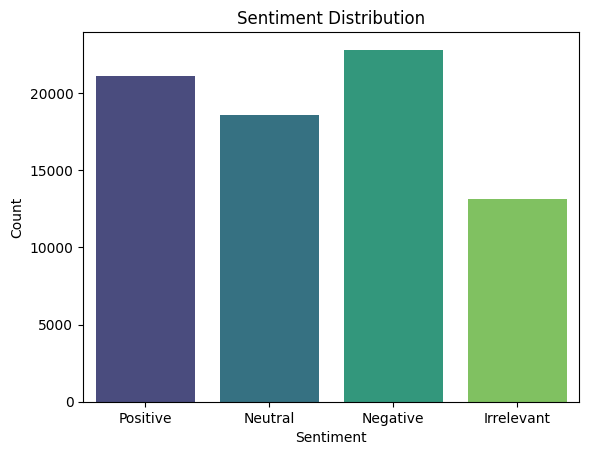

In [9]:
#DATA ANALYSIS & VISUALIZATION
#Visualize the count or proportion of each sentiment category (Sentiment coilumn)
sns.countplot(data=combined_data,x='Sentiment',palette='viridis')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

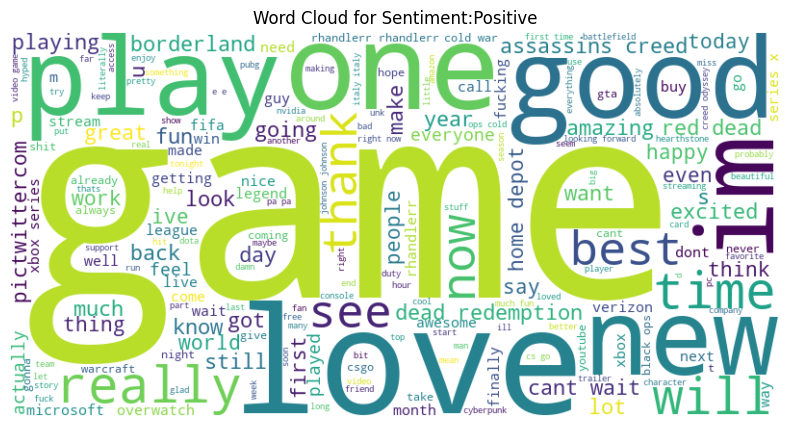

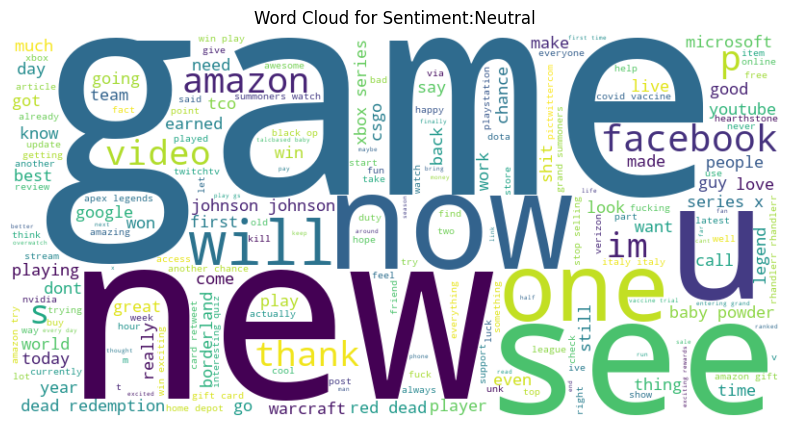

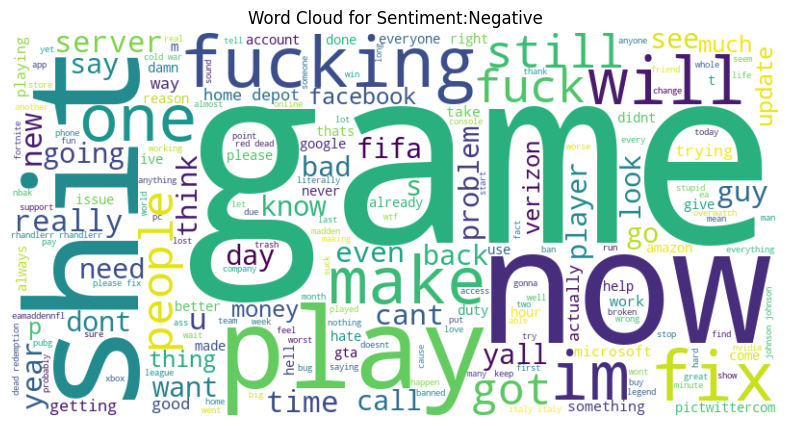

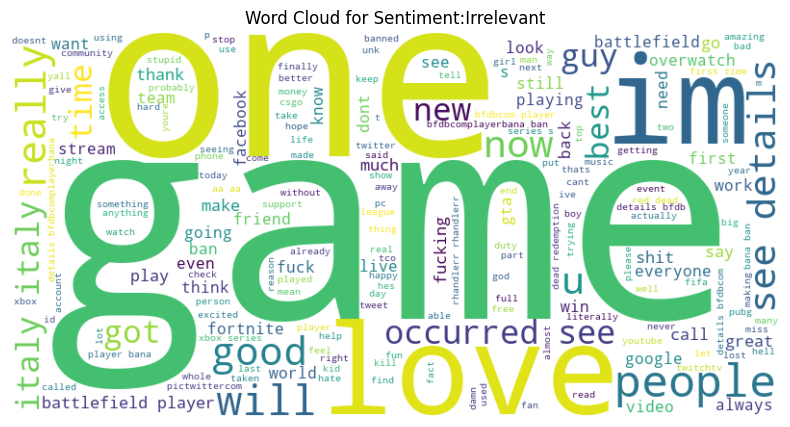

In [10]:
from wordcloud import WordCloud
#Display the most common words in the Cleaned_Text for each sentiment category
for sentiment in combined_data['Sentiment'].unique():
    text="".join(combined_data[combined_data['Sentiment']==sentiment]['Cleaned_Text'])
    wordcloud=WordCloud(width=800,height=400,background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f"Word Cloud for Sentiment:{sentiment}")
    plt.axis('off')
    plt.show()

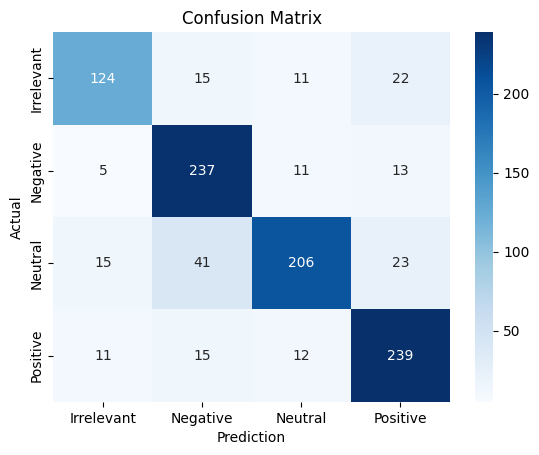

In [11]:
#Visualize the confusion matrix to evaluate model predictions
cm=confusion_matrix(Y_val,Y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',
xticklabels=label_encoder.classes_,yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

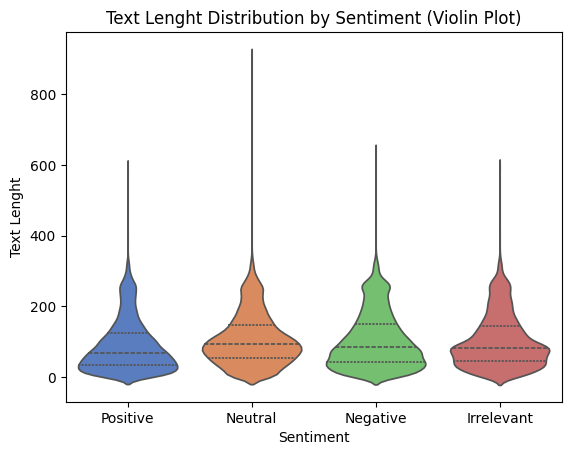

In [12]:
combined_data['Text_Lenght']=combined_data['Cleaned_Text'].apply(len)
#Analyze the distribution of text lenghts in tweets across sentiment categories
sns.violinplot(data=combined_data,x='Sentiment',y='Text_Lenght',palette='muted',inner="quartile")
plt.title("Text Lenght Distribution by Sentiment (Violin Plot)")
plt.xlabel("Sentiment")
plt.ylabel("Text Lenght")
plt.show()